# Binning customers to build segments

xxx

### Data Sources

Cleaned datafiles, as prepared in notebook 1: `profile_type_clean.csv`: demographic data and KPI for each of the offer types per customer.

### Changes

- 2019-01-22: Started notebook


In [43]:
# load libraries

import numpy as np
import pandas as pd
from tqdm import tqdm

# my own custom functions
import EDA_functions as EDA
import cleaning_functions as cleaning

# visualization
import matplotlib.pyplot as plt
import seaborn as sns #, sns.set_style('whitegrid')
color = 'rebeccapurple'
%matplotlib inline

# display settings
from IPython.display import display
pd.options.display.max_columns = None

from pathlib import Path  # to make file path references relative to notebook directory

In [44]:
# import preparated data

profile_type_file = Path.cwd() / "data" / "processed" / "profile_type_clean.csv"
profile_type = pd.read_csv(profile_type_file, index_col = 0, dtype={'gender' : 'category'})

## Pimp profile type data

Note: Socio-demographic features for 2'175 customers missing, they won't be interfered for this analysis.

In [45]:
display(profile_type)
display(profile_type.info())

,age,gender,income,member_days,offer_received,offer_viewed,offer_completed,viewed_received,completed_viewed,total_trans,total_amount,total_reward,total_profit,prop_reward,total_mean_amount,np_trans,np_amount,np_mean_amount,prop_np_trans,prop_np_amount,bogo_completed,bogo_viewed,bogo_trans,bogo_amount,discount_completed,discount_viewed,discount_trans,discount_amount,info_completed,info_viewed,info_trans,info_amount
p_1,NaN,NaN,NaN,-529,5.0,5.0,2.0,1.000000,2.0,9.0,20.40,5.0,15.40,0.245098,2.266667,0,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000,2.0,5.0,9.0,20.400,0.0,0.0,0.0,0.000
p_10,NaN,NaN,NaN,-611,4.0,3.0,1.0,0.750000,0.0,6.0,15.62,5.0,10.62,0.320102,2.603333,3,7.69,2.563333,0.500000,0.492318,0.0,2.0,3.0,7.930,0.0,0.0,0.0,0.000,0.0,1.0,0.0,0.000
p_100,68.0,F,84000.0,-725,5.0,0.0,1.0,0.000000,0.0,2.0,34.04,2.0,32.04,0.058754,17.020000,2,34.04,17.020000,1.000000,1.000000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000
p_1000,67.0,M,44000.0,-225,4.0,4.0,0.0,1.000000,0.0,5.0,19.78,0.0,19.78,0.000000,3.956000,2,13.37,6.685000,0.400000,0.675935,0.0,3.0,3.0,5.555,0.0,0.0,0.0,0.000,0.0,1.0,1.0,0.855
p_10000,NaN,NaN,NaN,-446,3.0,3.0,0.0,1.000000,0.0,6.0,7.28,0.0,7.28,0.000000,1.213333,1,1.83,1.830000,0.166667,0.251374,0.0,2.0,4.0,3.935,0.0,1.0,3.0,1.515,0.0,0.0,0.0,0.000
p_10001,56.0,F,71000.0,-716,5.0,5.0,4.0,1.000000,4.0,17.0,289.20,19.0,270.20,0.065698,17.011765,13,228.10,17.546154,0.764706,0.788728,1.0,1.0,1.0,7.310,3.0,3.0,4.0,53.790,0.0,1.0,0.0,0.000
p_10002,69.0,M,62000.0,-977,2.0,0.0,1.0,0.000000,0.0,8.0,139.84,5.0,134.84,0.035755,17.480000,8,139.84,17.480000,1.000000,1.000000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000
p_10003,66.0,F,74000.0,-72,3.0,2.0,2.0,0.666667,2.0,3.0,58.96,12.0,46.96,0.203528,19.653333,1,14.91,14.910000,0.333333,0.252883,1.0,1.0,1.0,15.090,1.0,1.0,1.0,28.960,0.0,0.0,0.0,0.000
p_10004,64.0,M,53000.0,-54,5.0,4.0,0.0,0.800000,0.0,0.0,0.00,0.0,0.00,0.000000,0.000000,0,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000,0.0,4.0,0.0,0.000,0.0,0.0,0.0,0.000
p_10005,28.0,M,64000.0,-295,6.0,4.0,2.0,0.666667,2.0,7.0,19.34,4.0,15.34,0.206825,2.762857,3,8.01,2.670000,0.428571,0.414168,0.0,2.0,2.0,2.740,2.0,2.0,2.0,8.590,0.0,0.0,0.0,0.000


<class 'pandas.core.frame.DataFrame'>
Index: 17000 entries, p_1 to p_9999
Data columns (total 32 columns):
age                   14825 non-null float64
gender                14825 non-null category
income                14825 non-null float64
member_days           17000 non-null int64
offer_received        17000 non-null float64
offer_viewed          17000 non-null float64
offer_completed       17000 non-null float64
viewed_received       17000 non-null float64
completed_viewed      17000 non-null float64
total_trans           17000 non-null float64
total_amount          17000 non-null float64
total_reward          17000 non-null float64
total_profit          17000 non-null float64
prop_reward           17000 non-null float64
total_mean_amount     17000 non-null float64
np_trans              17000 non-null int64
np_amount             17000 non-null float64
np_mean_amount        17000 non-null float64
prop_np_trans         17000 non-null float64
prop_np_amount        17000 non-null floa

None

In [46]:
"""remove oultiers"""

# count outliers (<> IQR=1.5)
cleaning.count_outliers_IQR_method(profile_type)

age
Identified outliers: 0
Percentage of outliers: 0.0%

income
Identified outliers: 0
Percentage of outliers: 0.0%

member_days
Identified outliers: 287
Percentage of outliers: 1.7%

offer_received
Identified outliers: 689
Percentage of outliers: 4.1%

offer_viewed
Identified outliers: 981
Percentage of outliers: 5.8%

offer_completed
Identified outliers: 0
Percentage of outliers: 0.0%

viewed_received
Identified outliers: 0
Percentage of outliers: 0.0%

completed_viewed
Identified outliers: 16
Percentage of outliers: 0.1%

total_trans
Identified outliers: 296
Percentage of outliers: 1.7%

total_amount
Identified outliers: 521
Percentage of outliers: 3.1%

total_reward
Identified outliers: 82
Percentage of outliers: 0.5%

total_profit
Identified outliers: 606
Percentage of outliers: 3.6%

prop_reward
Identified outliers: 414
Percentage of outliers: 2.4%

total_mean_amount
Identified outliers: 260
Percentage of outliers: 1.5%

np_trans
Identified outliers: 330
Percentage of outliers: 1

In [47]:
# clean outliers for total transactions and total amount
cleaning.remove_outliers_IQR_method(profile_type, outlier_cols=['total_amount', 'total_trans', 'total_mean_amount'])
len(profile_type)

total_amount
Rows removed: 521

total_trans
Rows removed: 265

total_mean_amount
Rows removed: 7


Rows removed in total: 793



16207

In [48]:
"""calculate some additional ratios"""

profile_type['prop_bogo_amount'] = profile_type['bogo_amount'] / profile_type['total_amount']
profile_type['prop_discount_amount'] = profile_type['discount_amount'] / profile_type['total_amount']
profile_type['prop_info_amount'] = profile_type['info_amount'] / profile_type['total_amount']

profile_type['bogo_vtc'] = profile_type['bogo_completed'] / profile_type['bogo_viewed']
profile_type['discount_vtc'] = profile_type['discount_completed'] / profile_type['discount_viewed']
profile_type['info_vtc'] = profile_type['info_completed'] / profile_type['info_viewed']

# eliminate NaN in aggregated data and check results
profile_type.iloc[: , 4:] = profile_type.iloc[: , 4:].fillna(value=0.0)
display(profile_type.head(2))

,age,gender,income,member_days,offer_received,offer_viewed,offer_completed,viewed_received,completed_viewed,total_trans,total_amount,total_reward,total_profit,prop_reward,total_mean_amount,np_trans,np_amount,np_mean_amount,prop_np_trans,prop_np_amount,bogo_completed,bogo_viewed,bogo_trans,bogo_amount,discount_completed,discount_viewed,discount_trans,discount_amount,info_completed,info_viewed,info_trans,info_amount,prop_bogo_amount,prop_discount_amount,prop_info_amount,bogo_vtc,discount_vtc,info_vtc
p_1,NaN,NaN,NaN,-529,5.0,5.0,2.0,1.00,2.0,9.0,20.40,5.0,15.40,0.245098,2.266667,0,0.00,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00,2.0,5.0,9.0,20.4,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.4,0.0
p_10,NaN,NaN,NaN,-611,4.0,3.0,1.0,0.75,0.0,6.0,15.62,5.0,10.62,0.320102,2.603333,3,7.69,2.563333,0.5,0.492318,0.0,2.0,3.0,7.93,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.507682,0.0,0.0,0.0,0.0,0.0


## Explore profit-related correlations

### Socio-demographic features

C:\Users\r2d4\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


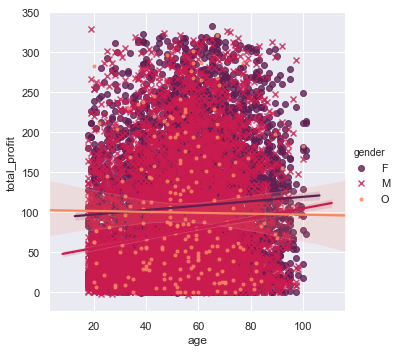

In [49]:
sns.lmplot(x='age', y="total_profit", hue="gender", data=profile_type,
           markers=["o", "x", "."], palette="rocket");

C:\Users\r2d4\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


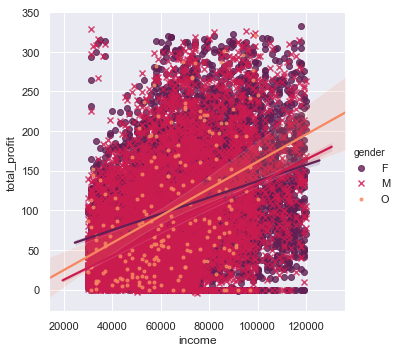

In [50]:
sns.lmplot(x='income', y="total_profit", hue="gender", data=profile_type,
           markers=["o", "x", "."], palette="rocket");

C:\Users\r2d4\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


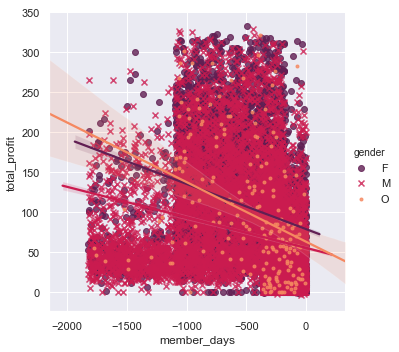

In [51]:
sns.lmplot(x='member_days', y="total_profit", hue="gender", data=profile_type,
           markers=["o", "x", "."], palette="rocket");

C:\Users\r2d4\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


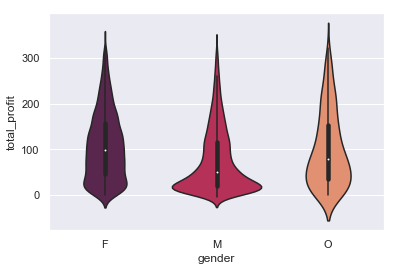

In [52]:
sns.violinplot(x='gender', y='total_profit', data=profile_type, palette='rocket')

**Observations:** Income, membership duration and gender have a bigger impact on profit than age.

---